# Set up and install

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow
import os

# Create processing function

In [3]:
def process_frame(frame):
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Flip the frame horizontally
    flipped_frame = cv2.flip(gray_frame, 1)

    # Rotate the frame by a random degree
    angle = random.uniform(-30, 30)
    rows, cols = flipped_frame.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_frame = cv2.warpAffine(flipped_frame, M, (cols, rows))

    # Add random noise to the frame
    noise = np.random.normal(0, 10, rotated_frame.shape).astype(np.uint8)
    noisy_frame = cv2.add(rotated_frame, noise)

    return noisy_frame

# Run

In [7]:
# Load Input
video_path = 'Intersection.mp4'
cap = cv2.VideoCapture(video_path)

In [8]:
# Set Output destination
output_path = 'gdrive/MyDrive/Application/Data/Requirement1a/'
if not os.path.exists(f'{output_path}'):
    os.mkdir(f'{output_path}')

In [9]:
# Processe frames
frame_id = 0
while True:
  ret, frame = cap.read()
  if not ret:
      break
  frame_id += 1
  print('Procesing frame -', frame_id)
  processed_frame = process_frame(frame)
  cv2.imwrite(os.path.join(output_path , f'frame{frame_id}.jpg'), processed_frame)

Procesing frame - 1
Procesing frame - 2
Procesing frame - 3
Procesing frame - 4
Procesing frame - 5
Procesing frame - 6
Procesing frame - 7
Procesing frame - 8
Procesing frame - 9
Procesing frame - 10
Procesing frame - 11
Procesing frame - 12
Procesing frame - 13
Procesing frame - 14
Procesing frame - 15
Procesing frame - 16
Procesing frame - 17
Procesing frame - 18
Procesing frame - 19
Procesing frame - 20
Procesing frame - 21
Procesing frame - 22
Procesing frame - 23
Procesing frame - 24
Procesing frame - 25
Procesing frame - 26
Procesing frame - 27
Procesing frame - 28
Procesing frame - 29
Procesing frame - 30
Procesing frame - 31
Procesing frame - 32
Procesing frame - 33
Procesing frame - 34
Procesing frame - 35
Procesing frame - 36
Procesing frame - 37
Procesing frame - 38
Procesing frame - 39
Procesing frame - 40
Procesing frame - 41
Procesing frame - 42
Procesing frame - 43
Procesing frame - 44
Procesing frame - 45
Procesing frame - 46
Procesing frame - 47
Procesing frame - 48
P

In [10]:
cap.release()
cv2.destroyAllWindows()

# View sample results

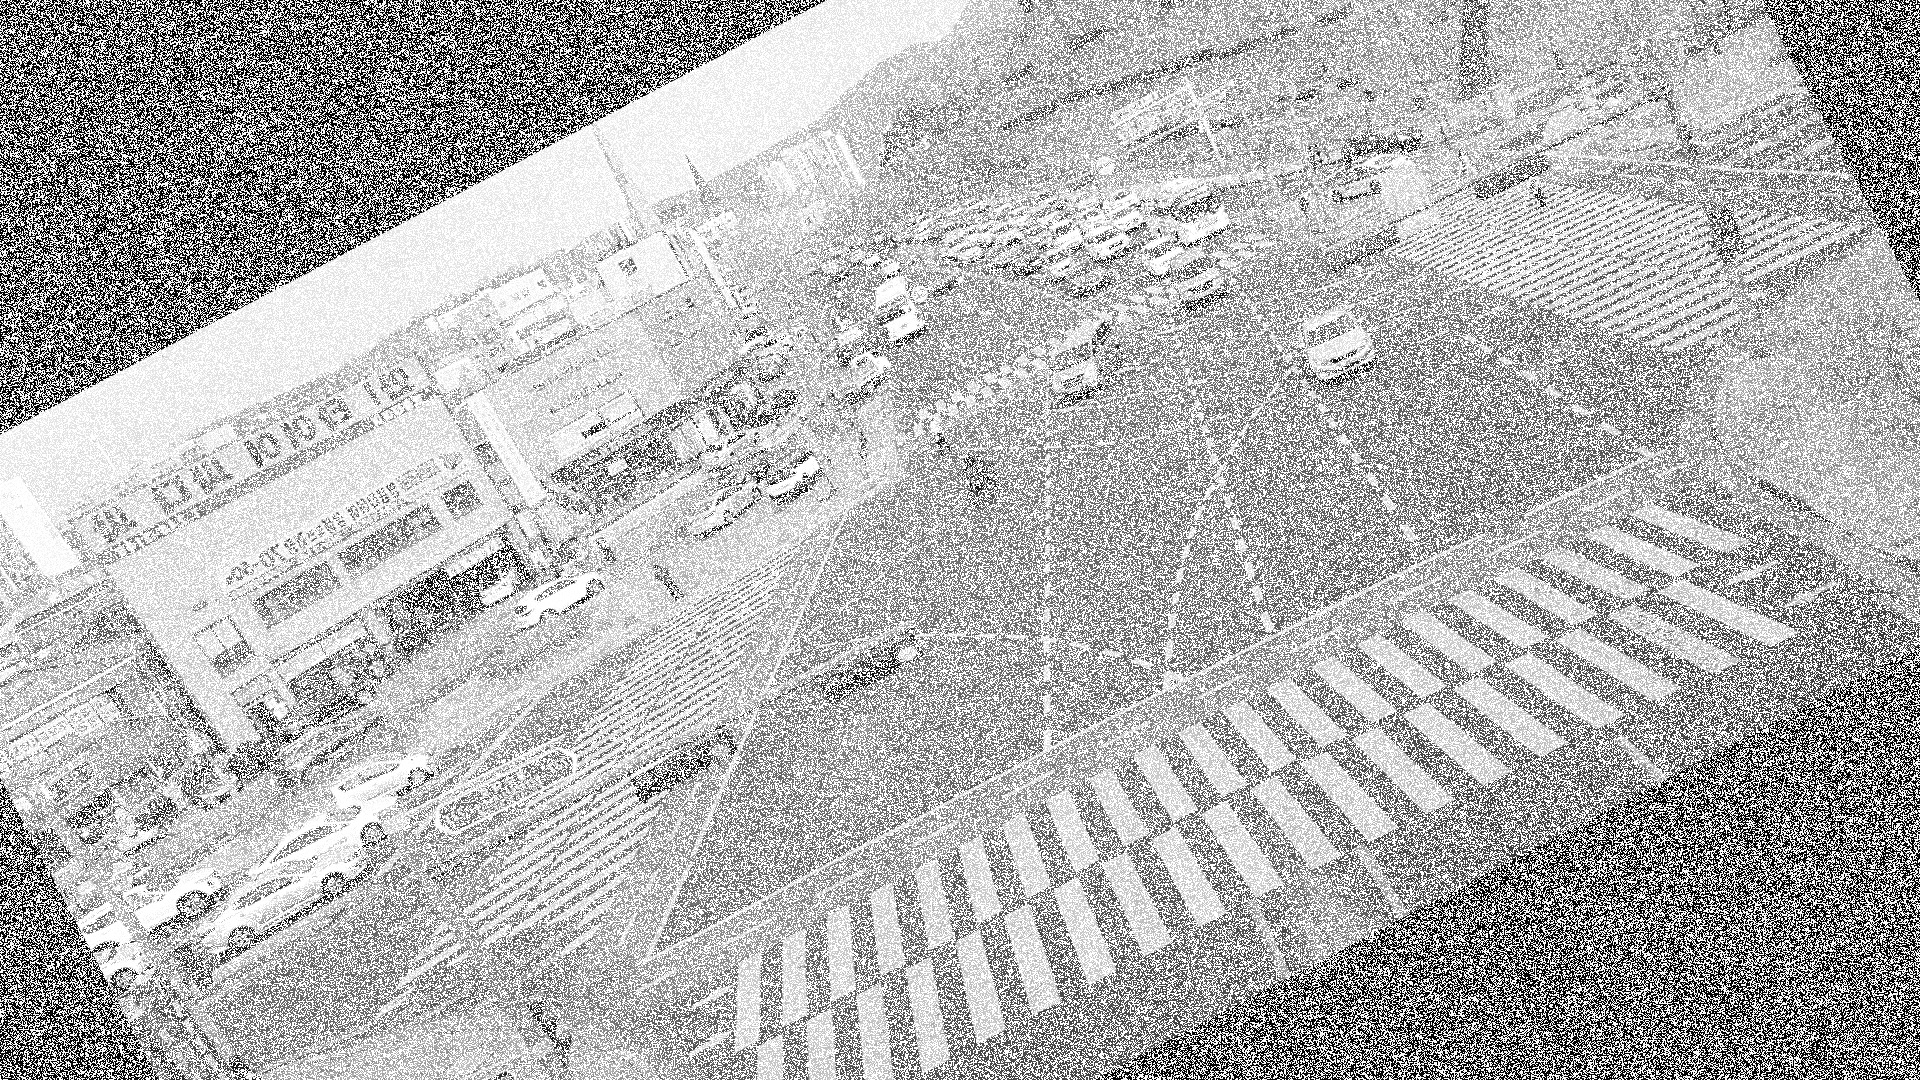

In [11]:
# Show frame_100
img = cv2.imread('gdrive/MyDrive/Application/Data/Requirement1a/frame100.jpg', 1)
cv2_imshow(img)

# Download the results

In [ ]:
import shutil

shutil.make_archive("/content/requirement1a_results", 'zip', "gdrive/MyDrive/Application/Data/Requirement1a")

In [ ]:
from google.colab import files

files.download('/content/requirement1a_results.zip')